# Linear Algebra
Author: Vo, Huynh Quang Nguyen

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Acknowledgements:
The contents of this note are based on the lecture notes and the materials from the following source:
1. _Mathematics for Machine Learning_ course given by Prof. David Dye, Dr Samuel J. Cooper, and Dr A. Freddie Page from Imperial College London, United Kingdom. 
Available in Coursera: [Mathematics for Machine Learning specialization](https://www.coursera.org/specializations/mathematics-machine-learning) 


2. _Mathematics for Machine Learning_ textbook by Prof. Marc Peter Deisenroth, Prof. A. Aldo Faisal, and Prof. Cheng Soon Ong. 

The book is freely available at [Mathematics for Machine Learning textbook](https://mml-book.github.io/) 

3. _Essential Math for Data Science in 6 Weeks_ webinar given by Dr Thomas Nield. 

Available in O'Reilly Learning: [Essential Math for Data Science in 6 Weeks webinar](https://learning.oreilly.com/attend/essential-math-for-data-science-in-6-weeks/0636920055929/0636920055928/)

4. _Deep Learning_ textbook by Dr Ian Goodfellow, Prof. Yoshua Bengio, and Prof. Aaron Courville. The book is available for public access via a designated website: [Deep Learning textbook](https://www.deeplearningbook.org/)


5. _ELEC-E3240 Photonics_ course given by Prof. Zhipei Sun and Huynh Quang Nguyen Vo (Teaching Assistant) from Aalto University, Finland.

Additionally, the author would like to express his sincerest gratitude to:
1. Prof. Alexander Jung (from Aalto University, Finland) for his easy-to-understand explanations on how to represent neural networks using matrices.


2. Prof. Jeff Heaton (from Washington University of St. Louis, USA) for his explanation on the $L^{p}$ normalization.


## Table of Contents
1. [Introduction to Linear Algebra](#Section1) 
2. [Vector operations](#Section2) 
3. [Matrix operations](#Section3) 
4. [Solving systems of equations](#Section4)
5. [Eigenvalues and Eigenvectors](#Section5)
6. [Appendix](#Section6)
7. [Suggestive Reading](#Section7)

## I. Introduction to Linear Algebra <a name = 'Section1'></a>

### 1. Why we have to learn?

1. Firstly, linear algebra can be found in many areas of science, technology, engineering, and data science. 


2. Secondly, linear algebra also serves as a crucial pillar in machine learning, data management, graphical modelling, and other computer science areas.


3. Thirdly, modern computers model data as vectors and matrices to perform operations more effectively.


4. Therefore, linear algebra is a **MUST** to advance your knowledge in machine learning, statistical modelling, or other areas in computer science.


### 2. Applications of Linear Algebra

As mentioned earlier, linear algebra serves as a backbone in many scientific fields, especially as one of the three main pillars in machine learning. Below are selected examples of how it is applied across various scientific fields.

#### a) Optics

<div>
<img src="images/ray-transfer-matrix.png" width="50%"/>
</div>

Figure 1: Ray transfer matrix analysis for imaging inside linear media. This method of image computation is widely employed when designing an optical system such as a microscope, a telescope, or a laser guidance system.

#### b) Computer vision

<div>
<img src="images/perspective.png" width="70%"/>
</div>

Figure 2: Perspective transformation from 3D into 2D (adapted from **Computer Vision: Algorithms and Applications** by Szeliski). This method of projection is popular in computer graphics when recreating 3D models in 2D environments.


![SegmentLocal](images/2D_Convolution_Animation.gif)

Figure 3: Operating principles of a 2-D convolution. The convolution operation serves as a backbone in mask-based image filtering, and convolutional neural network. 

#### c) Geography
<div>
<img src="images/geography.png" width="50%"/>    
</div>

Figure 4: Computation of an area of a polygon using coordinates. This method, which is often referred to as the shoelace algorithm or Gaussian area algorithm, is widely employed in computational geography for computing the area of a region.

#### d) Signal Processing
<div>
    <img src="images/signal.png" width="35%" />
    </div>

Figure 5: Operating principles of a digital filter. A signal in the time-domain is transformed to the frequency domain using Fourier transform, then subjected to a digital filter to smoothen out, and finally converted back to the time domain. This concept of filtering in frequency-domain can also be applicable for image processing.

![SegmentLocal](images/1D_convolution.gif)
Figure 6: Operating principles of a 1-D convolution. To filter a signal in its time domain, we perform the convolution between the signal and a filter (also called a kernel). 

![SegmentLocal](images/Fourier_transform_time_and_frequency_domains.gif)
Figure 7: Operating principles of a Fourier Transform. A signal in the time domain can be transformed to the frequency domain using Fourier transform. To filter a signal in its time domain, we perform the matrix multiplication between the signal and a digital filter.
$$
O(\omega) = H(\omega)\bullet I(\omega)
$$


## II. Vector operations <a name = "Section2"></a>

### 1. What is a vector:
1. Vectors are an arrow in space, with a specific direction and length. This can mean different things to different disciplines:
   * Physics - direction and magnitude (e.g velocity)
   * Computer Science - an array of data.
   * Math - A direction and scale on a designated coordinate system.


2. In the context of machine learning, we can formally define a vector as follows: a vector is a 1-D array of numbers, where each element is identified by an index.


3. For a two-dimensional vector, we can think of it as a pair of numbers. For example, we can interpret the following vector $\vec{v} = [3,4] $ as follows:
    * This vector has the name of $\vec{v}$.
    * From the origin (0,0) we make 3 stops along the x-axis, and 4 steps up the y-axis. 


4. When defining vectors, they must start at the origin (for example $(x_0,y_0) = (0,0)$ for a 2-D space) and cannot arbitrarily start at any point in space. We also need to say what kind of numbers are stored in the vector. If each element is in $\mathbb{R}$, and the vector has $n$ elements, then the
vector lies in the set formed by taking the Cartesian product of $\mathbb{R}$ n  times, denoted as $\mathbb{R}^n$.
$$
$$
<div>
<img src="images/vector-representation.png" width="100%"/>
</div>
Figure 1: Examples of 2D vectors.


5. Vectors can apply beyond just a 2-dimensional space. In practice, vectors can exist in any number of dimensions, although it gets hard to visualize outside of a 3-dimension space.


[3 4 5]
(3,)


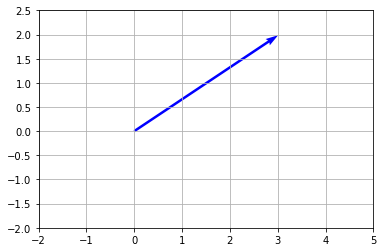

In [2]:
##
# DEMO: DECLARING A VECTOR
#

v = [3, 4, 5]
v = np.array(v)     # We use this function to convert a Python list into a vector
print(v)
print(v.shape)      #We use this function to determine the dimension of our vector

##
# DEMO: VECTOR VISUALIZATION
#
origin = np.array([0,0])  
v = np.array([3,2])

# Creating plot
plt.quiver(origin[0], origin[1], v[0], v[1], color='b', units='xy', scale=1)  
plt.xlim(-2, 5)
plt.ylim(-2, 2.5)
plt.grid()
plt.show()

### 2. Basic operations with vectors

#### a) Vector-on-vector addition and subtraction
1. To visually add these two vectors together, we connect one vector after the other and walk to the tip of the last vector. The point we end at is a new vector, the result of summing the two vectors. 


2. Because of the commutative nature of adding vectors, as it does not matter which order we add them.

$$
\vec{v} + \vec{w} = \begin{bmatrix} 3 \\ 2 \end{bmatrix} + \begin{bmatrix} 2 \\ -1 \end{bmatrix} = \begin{bmatrix} 2 \\ -1 \end{bmatrix} + \begin{bmatrix} 3 \\ 2 \end{bmatrix} = \begin{bmatrix} 5 \\ 1 \end{bmatrix}
$$

3. For subtraction, we can imagine it as a vector $\vec{v}$ sums with a 'negative' vector $-\vec{w}$ out of the original $\vec{w}$. Noted that the 'negative' notion here means a vector having the same length but with an opposite direction.

<div>
<img src="images/vector-add.png" width="100%"/>
</div>

Figure 2: An example of adding two vectors together by connecting one vector after the other and walking to the tip of the last vector.

#### b) Scalar-on-vector Multiplication
1. We can also grow/shrink a vector by multiplying (others referred to this as scaling, though it is a matter of word choice) with a scalar value.

<div>
<img src = "images/vector-multiply.png" width = "80%"/>
</div>

Figure 3: Examples of scaling a vector by a scalar: positive scalars increase/decrease the length of a vector (a-b), while negative scalars not only increase/decrease but also reverse a direction of a vector (c). 

2. As an additional note, a scalar is just a single number, in contrast to most of the other objects studied in linear algebra, which are usually arrays of multiple numbers. When we introduce scalars, we need to specify what kind of number they are: be it $\mathbb{N}$ (natural numbers), $\mathbb{Z}$ (integers), $\mathbb{R}$ (real numbers).

#### c) Magnitude and Normalization
1. A magnitude (length) of a vector can be computed as follows:
$$
||\vec{v}|| = \sqrt{v_1^2 + v_2^2 + ... + v_n^2}
$$

2. A vector can be normalized by dividing its elements by their magnitude:

$$
\vec{v}_{norm} = \frac{\vec{v}}{||\vec{v}||} = \frac{1}{\sqrt{v_1^2 + v_2^2 + ... + v_n^2}}\begin{bmatrix} v_1\\ v_2 \\ ... \\v_n \end{bmatrix}
$$

3. The above equation that computes the length of a vector is the so-called $L^2$ normalization also known as the **Euclidean** normalization. In practice, a vector can be subjected to $L^p$ normalization with $p\ge1$:
$$
||\vec{v}||_p = (\sum_{i} |v_i|^p)^{1/p}
$$

4. In Machine Learning, we commonly use the $L^{1}$, $L^{2}$, and $L^{\infty}$ normalizations. The reasons are as follows:

***
* Recall that the general normalization of a vector is:
$$
||\vec{v}||_p = (\sum_{i} |v_i|^p)^{1/p}
$$

* For $L^{1}$ normalization, we can rewrite the above expression as:

$$
||\vec{v}||_1 = \sum_{i} |v_i| = |v_1| + |v_2| + ... + |v_n|
$$

* We can see that $L^{1}$ normalization is the sum of all corresponding absolute values of every element in a vector. This is the most intuitive way to understand measure the distance between vectors and measure the magnitude of a vector. For example, consider we have a vector $\vec{v} = [3, 4]$, the magnitude of this vector is computed as:

$$
||\vec{v}||_1 = |3| + |4| = 7
$$

* This means, to measure the magnitude of this vector, we walk 3 steps along the x-axis, then 4 steps along the y-axis. Thus, the distance we have travelled is 7 (as seen in the below figure).

<div>
    <img src = "images/L1_norm.jpg" />
    </div>

* On the other hand, the most interesting property of this normalization is that: imagine we take all the elements of a vector divided by the norm, the sum of all the elements will be exactly one. Because of this interesting property, we usually use $L_1$ normalization to make our data less complex for a machine learning model to train.

***
* As mentioned above, the $L^{2}$ normalization also known as the Euclidean normalization is the most popular normalization we have and would ever see to compute the magnitude of a vector. Why? Because it is the shortest distance to go from one point to another.
    
    
* Using the same example as in $L_1$ normalization, the $L_2$ normalization is computed as:

$$
||\vec{v}||_2 = \sqrt{|3|^2 + |4|^2} = 5
$$

* It is clearly that the normalization we just computed is the most direct route (as seen in the below figure).
<div>
    <img src = "images/L2_norm.jpg" />
    </div>
    
* On the other hand, the most interesting property of this normalization is that: the outlier elements presented in the vector significantly affect the normalization because of the square operation. Thus, $L_2$ is one of the most effective ways to study the outliers in a vector.

***
* The $L^{\infty}$ normalization gives us the largest magnitude (in absolute value) among each element of a vector:
$$
L^{\infty} = max_{i}|x_i|
$$


* As an example, consider a vector $\vec{v}= [-6, 4, 2]$, the $L^{\infty}$ normalization of this vector is 6.


* The most interesting property of this normalization is that only the largest element has any effect. So, let's say if our vector represents the cost of constructing a building, by minimizing $L^{\infty}$ we are reducing the cost of the most expensive building.

***

#### d) Dot product and cross product
1. Dot product, also known as scalar product or inner product, is a pair-wise operation between two vectors and returns a single number. Geometrically speaking in 2D and 3D, it is the product of the Euclidean magnitudes of the two vectors and the cosine of the angle between them.

$$
\vec{v} \bullet \vec{w} = ||\vec{v}||_2||\vec{w}||_2cos(\vec{v},\vec{w})
$$

$$
\vec{v} \bullet \vec{w} = v_1w_1 + v_2w_2 + ... + v_nw_n
$$

2. Cross product is the operation that takes two vectors and returns a vector that is perpendicular to the plane from the aforementioned vectors.
$$
\vec{v} \times \vec{w} = ||\vec{v}||_2||\vec{w}||_2cos(\vec{v},\vec{w})
$$

<div>
<img src ="images/dot-cross-product.png" width ="80%"/>
</div>

Figure 4: Visualization of a dot product and a cross product between vector $\vec{A}$ and $\vec{B}$. The angle between $\vec{A}$ and $\vec{B}$ is $\theta$. Notice the notion $\vec{e}$ means the result of a cross product is a vector.

3. Let's revisiting the dot product. We know that a dot product is an operation that does a multiply/add operation between elements in vectors and matrices. So exactly what does it try to accomplish?


4. We can think of the dot product between two vectors as taking one vector’s length, and projecting another vector onto it and multiplying that resulting vector’s length.
For example, we project $\vec{w}$ directly onto $\vec{v}$. The dot product between $\vec{w}$ and $\vec{v}$ is a scalar that is the product between the projection of $\vec{w}$'s length and the $\vec{v}$'s length.

<div>
<img src ="images/dot-product.png" width = 80%>
</div>

Figure 5: The operation of a dot product between two vectors.
 

#### e) Scalar projection
1. Scalar projects are the size of the “shadow” of a vector onto another vector, if we imagine the sun shining down perpendicular to the second vector. Vector projections are that shadow vector. As the names imply, scalar projects are scalars and vector projections are vectors.

<div>
<img src ="images/scalar-projection.png" width ="30%"/>
</div>

Figure 6: An example of a vector $\vec{s}$ projected onto another vector $\vec{r}$ resulting a vector $\vec{s_1}$.

2. The scalar projection of $\vec{s}$ onto $\vec{r}$ is calculated as :

$$
\frac{\vec{r}\bullet\vec{s}}{||\vec{r}||_2}
$$ 

3. The vector projection is calculated as:

$$\vec{r}\frac{\vec{r}\bullet\vec{s}}{r^2}
$$

For example, we want to project on $\vec{s} = \begin{bmatrix} 10 \\ 5 \\ -6 \end{bmatrix}$ onto $\begin{bmatrix} 3 \\ -4 \\ 0 \end{bmatrix}$.
* The resulting scalar projection is $\frac{\vec{r}\bullet\vec{s}}{||\vec{r}||_2} = \frac{10}{5} = 2 $
* The resulting vector projection is $\vec{r}\frac{\vec{r}\bullet\vec{s}}{r^2} = \begin{bmatrix} 3 \\ -4 \\ 0\end{bmatrix} \frac{10}{25} = \begin{bmatrix} 6/5 \\ -8/5 \\ 0 \end{bmatrix}$

#### f) Basis vectors, basis decomposition and basis transformation
1. A vector can be decomposed and represented by its basis vectors. For example, consider a vector $\vec{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$, it can be decompose into:
$$
\vec{v} = \begin{bmatrix} 3 \\ 2 \end{bmatrix} = 3\vec{i} + 2\vec{j} = 3\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

2. Thus, we can understand that the basis vectors are the “reference points” we use to describe other vectors. A basis vector having a length of 1 and point in perpendicular positive directions is called the **standard basis vector**. In 2D, two **standard basis vectors** (one for the x-axis and the other for the y-axis) can be combined to form a so-called **identity matrix**.

$$
\vec{i}\vec{j} = \begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}
$$

The basis vector concept can be extended beyond 2D ($\vec{i}$, $\vec{j}$) to 3D ($\vec{i}$, $\vec{j}$, $\vec{k}$), and to
as many additional dimensions we need. As a result, we can expand the above **identity matrix** to a multi-dimensional **identity matrix**.

$$
\mathbf{I} = \begin{bmatrix} 1 & 0 & 0 & ... & 0 \\ 0 & 1 & 0 & ...  & 0 \\ 0 & 0 & 1 & ... & 0 \\ ... & ... & ... & ... & ... \\ 0 & 0 & 0 & ... & 1  \end{bmatrix}
$$

Overall, the basis vectors can be anything as long as they are **orthogonal** to each other, which means their dot product is zero.

3. To conduct a basis decomposition of a vector $\vec{v}$ onto a set of basis vectors $\vec{b_1}$ and $\vec{b_2}$, we can simply use:
$$
v'_{b_1} = \frac{\vec{b_1}\bullet\vec{v}}{b_1^2}
$$

$$
v'_{b_2} = \frac{\vec{b_2}\bullet\vec{v}}{b_2^2}
$$

$$
\vec{v}'= \begin{bmatrix} v'_{b_1} \\ v'_{b_2} \end{bmatrix}
$$

If the basis vectors are the standard basis vectors, then it is very straightforward. 


<div>
<img src="images/basis-vector.png" width="50%"/>
</div>

Figure 7: Visualization of two standard basis vectors $\vec{i}$ and $\vec{j}$ (a), and how a vector is represented using two basis vectors (b).

4. Basis transformation, to put it simply, is changing from one set of reference points to another set of reference points. This transformation usually involves a matrix.  

<div>
<img src="images/basis-transformation.png" width="20%"/>
</div>

Figure 8: Visualization of two different sets of basis vectors. They can be transformed to one another by using basis transformation.

#### d) Span and linearly independent
1. Considering two vectors $\vec{v}$ and $\vec{w}$ fixed in two different directions, both vectors can be scaled and added to create **any** new vector $\alpha\vec{v} + \beta\vec{w}$. Thus, the entire space of vectors we can create from two vectors is known as **span**. Therefore, if the sum of these two vectors gives us access to all vectors in space, they are called **linearly independent**.

![SegmentLocal](images/linear-combination.gif)

Figure 9: Visualization of linear combination. Given a vector $\vec{v}$ + $\vec{w}$, a linear combination is defined when we create a new vector that is a sum of $\vec{v}$ or $\vec{w}$, or a sum of any arbitrary $\alpha\vec{v}$ and $\beta\vec{v}$ (adapted from **Essence of Algebra** video playlist from _3 Blue 1 Brown_ Youtube channel). 


![SegmentLocal](images/span.gif)

Figure 10: Visualization of span. Given a vector $\vec{v}$ + $\vec{w}$, a span is defined as all the possible combination of $\alpha\vec{v}$ and $\beta\vec{v}$ (adapted from **Essence of Algebra** video playlist from _3 Blue 1 Brown_ Youtube channel). 

2. Characteristics of linear independency:
    * Considering a 3-D vector space, if two vectors are linearly dependent (share a direction) but a third one is linearly independent of the other two, the span will be a flat plane in space. 
    * If all three vectors were linearly dependent, their span would only be a line in space. 
    * If all three vectors were linearly independent, their span would be a 3-D space.
    * This concept applies to any number of dimensions, not just 2-D or 3-D.
    
<div>
<img src="images/linear-dependent.png" width = "50%"/>
</div>

Figure 11: An examples of three linearly independent vectors forming a span that is a 3D space (a); if one or two of them are linear dependent, their span will be a flat plane in space (b-c).


3. We can determine whether a set of vectors are linear independent using the following steps:
    * For example, we have three vectors to consider $\vec{v}_1 = \begin{bmatrix} 0 \\ 1 \\ 5 \end{bmatrix} $, $\vec{v}_2 = \begin{bmatrix} 1 \\ 2 \\ 8 \end{bmatrix} $, $\vec{v}_3 = \begin{bmatrix} 4 \\ -1 \\ 0 \end{bmatrix} $. To determine the linear independecy, we need to find a set of scalars that fulfills
$$
c_1 \begin{bmatrix} 0 \\ 1 \\ 5 \end{bmatrix} + c_2 \begin{bmatrix} 1 \\ 2 \\ 8 \end{bmatrix} + c_3 \begin{bmatrix} 4 \\ -1 \\ 0 \end{bmatrix} = 0 
$$
    * After solving this, the only set of scalars that fulfills this equation is $c_1 = c_2 = c_3 = 0$. Therefore, we can conclude that these vectors are linear indepedent.
    * An easier method is forming a matrix containing the vectors-under-interest, then finding its matrix determinant. If the determinant is zero, then some or all vectors-under-interest are linear dependents.


In [3]:
v = np.array([3, 2])
w = np.array([2, -1])

##
# DEMO: VECTOR-ON-VECTOR ADDITION
#
add = v + w
print(add)

##
# DEMO: VECTOR-ON-VECTOR MULTIPLICATION
#
mul = -1.5 * v
print(mul)

##
# DEMO: DOT PRODUCT AND CROSS PRODUCT
#
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
dot = np.dot(x,y)
cross = np.cross(x,y)
print(dot)
print(cross)

##
# DEMO: BASIC DECOMPOSITION
#
i_hat = np.array([3, 4])
j_hat = np.array([4, -3])
v = np.array([10,-5])

w = [np.dot(i_hat,v) / np.linalg.norm(i_hat) ** 2, 
     np.dot(j_hat,v) / np.linalg.norm(j_hat)** 2]
print(w)

##
# DEMO: LINEAR INDEPENDENCE
#
v_1 = np.array([0,1,5])
v_2 = np.array([1,2,8])
v_3 = np.array([4,-1,0])

v = np.array([v_1, v_2, v_3]).transpose()
result = np.linalg.det(v)

if not result == 0:
    print('These vectors are linear independent.')
   

[5 1]
[-4.5 -3. ]
32
[-3  6 -3]
[0.4, 2.2]
These vectors are linear independent.


## II. Matrix operations <a name = "Section3" ></a>

### 1. What is a matrix:
1. A matrix is like a vector (or collection of vectors), and it can have multiple rows and columns. 


2. In the context of machine learning, we can formally define a matrix as follows: a matrix is a 2-D array of numbers, so each element is identiﬁed by two indices instead of just one.  If a real-valued matrix A has a height of m and a width of n, then we say that $A ∈ \mathbb{R}^{m×n}$.


3. In practice, matrix is a convenient way to package data. For example, it is more convenient to represent a system of equations as matrices.

In [4]:
##
# DEMO: DECLARE A MATRIX
#
v = [[3,4,5], [6,7,8]]
v = np.array(v)
print(v)
print(v.shape)

[[3 4 5]
 [6 7 8]]
(2, 3)


### 2. Basic matrix operations:

#### a. Matrix-on-vector multiplication
1. Recall the basis transformation, the basis transformation is technically speaking a matrix-on-vector multiplication.
$$
\begin{bmatrix} x_{new} \\ y_{new} \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x_{old} \\ y_{old} \end{bmatrix}
$$

    * For example, finding an image (output) of an object formed by an optical system is just applying matrix-vector multiplication. Here, our vectors are an object and its corresponding image, and the matrix is the transformation matrix (**M**) of the system.
    * Another example is vector rotation by an angle of $\theta$ described as: $\vec{v} = \vec{u}\begin{bmatrix} cos\theta & -sin\theta \\ sin\theta  & cos\theta \end{bmatrix}$

<div>
<img src ="images/matrix-vector.png" width="30%"/>
</div>

Figure 1: An example of matrix-on-vector multiplication: finding the output image of an object created by an optical system (adapted from **Fundamentals of Photonics** by Saleh et al.)

<div>
<img src="images/basis.png" width = "30%"/>
</div>

Figure 2: Rotation of a vector $\vec{u}$ into a vector $\vec{v}$ by an angle $\theta$.


2. Matrix-vector multiplication is done by computing the dot product between a matrix and a vector:

<div>
<img src = "images/dot-produc-matrix.png" width= "50%"/>
</div>

Figure 3: How the dot product between a matrix and a vector works.

3. Using the concept of matrix-on-vector multiplication, we can describe a wide variety of transformations such as rotations, reflections, dilations, and much more.


4. So why do we care much about matrix-on-vector multiplication? The reasons are as follows:

***
* Considering one of the pinnacles of machine learning models that is the neural networks, here, we consider the simplest one: a neural network with two neurons and one output (as seen in the below figure).
<div>
    <img src = "images/neural_network_1.png" width = 50%/>
    </div>
* We can express the output of this network as follows:
$$
O = 0.5\times0.3 + 0.2\times0.2 = 0.19
$$

* Now what if our neural network has two neurons and two output? Instead of going through each node, we can simply represent the outputs using the matrix-on-vector multiplication (as seen in the below figure).
<div>
    <img src = "images/neural_network_2.png" width = 50%/>
    </div>
***

#### b. Linear Transformation

1. To make things simple, let's consider the rotation of basis $(\vec{u_1},\vec{u_2})$ to the new basis $(\vec{v_1},\vec{v_2})$ by an angle $\theta$. Here, the basis notation means 'a reference system' consisting of 'reference points' that are our basis vectors.

<div>
<img src = "images/linear_transform.png" width= "25%"/>
</div>

Figure 4: An example of the linear transformation: the rotation of a vector $\vec{x}$ by an angle of $\theta$ to get a vector $\vec{y}$.

2. We know that this basis rotation is simply put a basis transformation:
$$
(\vec{v_1},\vec{v_2})  =  (\vec{u_1},\vec{u_2}) \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta  & cos\theta \end{bmatrix}
$$    

3. Therefore, we can simply describe this using this formula:
$$
(\vec{v_1},\vec{v_2})  =  (\vec{u_1},\vec{u_2})(\mathbf{u}→\mathbf{v})
$$

4. Because of the basis transformation, we can describe a changes of a coordinates of a vector from an old basis $(\vec{u_1},\vec{u_2})$ to a new basis $(\vec{v_1},\vec{v_2})$ as: 

$$
\begin{bmatrix} x_{new} \\ y_{new} \end{bmatrix} = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta  & cos\theta \end{bmatrix} \begin{bmatrix} x_{old} \\ y_{old} \end{bmatrix}
$$

or in this formula:

$$
\mathbf{x}^{\mathbf{v}} = (\mathbf{u}→\mathbf{v})\mathbf{x}^{\mathbf{u}}
$$


5. Next, imagine that we fix our old basis $(\vec{u_1},\vec{u_2})$ and now represent all vectors with this basis. So, we have a vector $\vec{x}$ then we rotate it by an angle $\theta$ to transform into a vector $\vec{y}$. Now, instead of describing the vector $\vec{y}$ with a new basis $(\vec{v_1},\vec{v_2})$, we describe that vector with our own fixed basis. This description is called linear transformation, and can be simply described with the formula:

$$
\mathbf{y}^{\mathbf{u}} = (\mathbf{u}→\mathbf{v})\mathbf{x}^{\mathbf{u}}
$$

6. According to what we have analyzed so far, we can think of linear transformation as tracking where the basis vectors land, and then we can use that to transform a vector also. This concept of seeing where the basis vectors land is important because it allows us not just to create vectors but also transform existing vectors.
    * For example, we have this vector $\vec{v} = \begin{bmatrix} 4 \\ 2 \end{bmatrix}$, and we transformed it somehow and it became $\vec{w}$. The basis vectors $\vec{i}$ and $\vec{j}$ now land at $\begin{bmatrix} -0.25 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ -1 \end{bmatrix}$, respectively. We can describe the new vector with our fixed basis ($\vec{i}$, $\vec{j}$) as:

$$
\vec{w} = \begin{bmatrix} -0.25 & 0 \\ 0 & -1 \end{bmatrix} \vec{v} = \begin{bmatrix} -1 \\ -2 \end{bmatrix}
$$

$$
$$

<div>
<img src="images/lineartransformation.png" width = "100%" />
</div>

Figure 4: An example of the linear transformation: linear transformation is tracking where the basis vectors land and use them to describe a transformed vector (a-b); using this concept, we can describe nearly almost all typical linear transformations such as sheer, rotation, flip, scale, etc.

![SegmentLocal](images/linear-transformation.gif)

Figure 5: Visualization of linear transformation. Imagine we have space $\mathbb{T}$ having a grid inside, and we apply a linear transformation to $\mathbb{T}$. The result is a new space $\mathbb{T}'$ where the lines of the inside grid still retain their straightness. 

#### c. Determinant
1. When we perform linear transformations, we are expanding or reducing space, and the degree of this expansion or reduction is called **determinant**. In other words, **determinants** describe how much a sampled area in vector space changes in scale with linear transformations.

![SegmentLocal](images/determinant-1.gif)

Figure 6: Visualizaion of a matrix, says $\begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix}$. We can visualize this matrix as a linear transformation of a unit matrix $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$ by first walking 3 steps on the x-axis then 2 steps on the y-axis (adapted from **Essence of Algebra** video playlist from _3 Blue 1 Brown_ Youtube channel).

![SegmentLocal](images/determinant-2.gif)

Figure 7: Visualization of a determinant: as mentioned above, we says the $\begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix}$ is a linear transformation of a unit matrix $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$. The determinant is the magnitude of this transformation, which is illustrated here as the new area created by the given matrix (adapted from **Essence of Algebra** video playlist from _3 Blue 1 Brown_ Youtube channel).

2. Characteristics of determinant:
    * Scaling will increase or decrease the determinant, as that will increase/decrease the sampled area. Shear or rotation do not affect the magnitude of the determinant.
    * When the orientation flips (for example, $\vec{i}$ and $\vec{j}$ swap clockwise positions) then the determinant will be negative.
    * When a determinant is 0, that means the transformation is linearly dependent and has squished all of space into a line. Because at this point, there is no area! This is why testing whether a determinant is zero tells us about linear dependency.
    * As usual, the determinant extends to 3 or more dimensions. At higher dimensions, it becomes a matter of visualizing a sampled volume scaling, rotating, sheering, and flipping.
    
<div>
<img src="images/determinants.png" width="100%">
</div>

Figure 8: Determinants and their characteristics: a determinant is simply how much a sampled area in vector space changes in scale with linear transformations (a); shear or rotation do not affect the determinant (b-c); if a determinant is zero, then the sampled area formed by two vectors is zero meaning they are linearly dependent.

#### d. Matrix-on-Matrix Multiplication
1. We can think of matrix multiplication as applying multiple transformations to a vector space. In other words, we can think of each transformation matrix as a function, where we apply from the inner-most and then outwards. 

For example, we have a vector $\vec{v}$, and we want to apply the rotation then a sheer transformations to this vector:
* The rotation transformation is described as: $\mathbf{r} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$.
* The shear transformation is described as: $\mathbf{s} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$.
* The combined rotation and shear is: $\mathbf{M} = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$. Notice the order of the matrices.
* Therefore, the new vector $\vec{w}$ is:
$\vec{w} = \begin{bmatrix} x_{new} \\ y_{new} \end{bmatrix} = M \begin{bmatrix} x_{old} \\ y_{old} \end{bmatrix} $

<div>
<img src="images/matrix-matrix-mul.png" width="50%">
</div>

Figure 9: An example of how rotation and shear transformations look like. A combined transformation of rotation and shear is simply matrix-matrix multiplication.

#### e. Special types of matrices:
1. A tensor is an array of numbers arranged on a regular grid with a variable number of axes is known as a tensor. We identify the element of a tensor $\mathbf{A}$ at coordinates $(i,j,k)$ by writing $\mathbf{A}_{i,j,k}$. 

<div>
    <img src="images/tensor.png" width = 30%/>
    </div>

Figure 10: An example of a tensor: an RBG image. An RBG image consists of three channels (Red, Green, and Blue), and the number of channels corresponds to the number of axes we have. Moreover, each channel is just an array with a height m and a width n, and we usually refer to the channel dimension as resolution. 


2. An identity matrix is formally defined as a matrix that does not change any vector when we multiply that vector by that matrix. As mentioned above, an identity matrix is simply all of the entries along the main diagonal are 1, while all of the other entries are zero. Noted that an identity matrix is a square matrix, meaning its height is equal to its width.

$$
∀\vec{x} ∈ \mathbb{R}^n, \mathbf{I}\vec{x} = \vec{x}.
$$

3. Consider a matrix $\mathbf{A}$, the matrix inverse of $\mathbf{A}$ is deﬁned as the matrix such that:
$$
\mathbf{A}\mathbf{A}^{-1} = \mathbf{I}
$$


4. A diagonal matrix is a matrix that consists mostly of zeros and has non-zero entries only along the main diagonal. One example of the diagonal matrix is the identity matrix.


5. A symmetric matrix is any matrix that is equal to its transpose. Noted that transpose is an operation that flips the columns and the rows of a matrix along its diagonal line.

$$
\mathbf{A} = \mathbf{A}^T
$$

![SegmentLocal](images/transpose.gif)

Figure 11: Visualization of the transpose operation for a matrix $\mathbf{A} ∈ \mathbb{R}^{m\times n} $


In [5]:
##
# DEMO: MATRIX-ON-MATRIX MULTIPLICATION
#
R = np.array([[0, -1],[1,0]])
S = np.array([[1,1],[0,1]])

M = np.dot(S,R)
print(M)

[[ 1 -1]
 [ 1  0]]


## IV. Solving a system of linear equations <a name = "Section4"></a>
1. We can represent a system of linear equations as a set of matrices.

For example, we have a system of equation like this:
$$
4x + 2y + 4z = 44
$$
$$
5x + 3y + 7z = 56
$$
$$
9x + 3y + 6z = 72
$$
* We need to solve for x, y and z so we can rewrite our system as: $ \mathbf{A} = \begin{bmatrix} 4 & 2 & 4 \\ 5 & 3 & 7 \\ 9 & 3 & 6 \end{bmatrix}$, $\mathbf{B} = \begin{bmatrix} 44 \\ 56 \\ 72 \end{bmatrix}$, $\mathbf{C} = \begin{bmatrix} x \\ y \\ z \end{bmatrix}$
* We know that: $\mathbf{A}\mathbf{X} = \mathbf{B}$. Therefore, we can rewrite $\mathbf{X}$ as function between $\mathbf{A}$ and $\mathbf{B}$ as: $\mathbf{X} = \mathbf{A}^{-1}\mathbf{B}$, with $\mathbf{A}^{-1}$ is the inverse matrix of $\mathbf{A}$. 

In [6]:
##
# DEMO: SOLVING A SYSTEM OF LINEAR EQUATIONS:
#
A = np.array([[4,2,4],[5,3,7],[9,3,6]])
B = np.array([44,56,72]).transpose()
X = np.dot(np.linalg.inv(A),B)
print(X)

[ 2. 34. -8.]


## V. Eigen values and eigen vectors <a name = "Section5"></a>

###  1. Matrix decomposition
1. It is the method of breaking up a matrix into its basic components. Matrix decomposition is helpful for tasks like finding inverse matrices, calculating determinants, as well as linear regression.


2. There are many ways to decompose a matrix, but the most common method is eigendecomposition, which is often used for machine learning and Principal Component Analysis (PCA). 

### 2. Eigen decomposition
1. For a square matrix **A**, an eigenvector ($\vec{v}$) and eigenvalue ($\lambda$) make this equation true:

$$
\mathbf{A}\vec{v} = \lambda\vec{v}
$$

For example, we have a square matrix **A** = $\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix}$. Its eigenvector and eigenvalue is $\begin{bmatrix} 1 \\ 4 \end{bmatrix}$ and 6, respectively.

* Compute the left-hand size (LHS) of the equation: $\mathbf{A}\vec{v} = \begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} \begin{bmatrix} 1 \\ 4 \end{bmatrix} = \begin{bmatrix} 6 \\ 24 \end{bmatrix} $
* Compute the right-hand size (RHS) of the equation: $\lambda\vec{v} = 6 \begin{bmatrix} 1 \\ 4 \end{bmatrix} = \begin{bmatrix} 6 \\ 24 \end{bmatrix} $
* Therefore, the equation is fulfilled.


2. To put it simply, eigendecomposition is a type of transformation to find the eigenvalues and eigenvectors.


3. We assume that the eigenvector is non-zero.

<div>
    <img src = "images/eigenvalue_meme.jpg" width = 50%>
    </div>
    
Figure 1: A fun joke about the eigenvalue. In the movie _Avengers: Endgame_, our hero Tony Stark (Iron Man) computed the eigenvalue and the spectral transform (also known as the Fourier Transform) of a Mobius Strip and discovered time travel was indeed possible.

### 3. Finding eigen parameters:
1. First, we find the eigenvalue by manipulating our equation:
$$
\mathbf{A}\vec{v} = \lambda\vec{v}
$$

$$
\mathbf{A}\vec{v} - \lambda I\vec{v} = 0
$$

$$
\mathbf{det}(\mathbf{A} - \lambda I) = 0
$$

For example, we have a square matrix **A** = $\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix}$, then the final equation becomes:
$$
\mathbf{det}(\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} - \lambda\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}) = 0
$$

$$
\mathbf{det}(\begin{bmatrix} -6 - \lambda & 3 \\ 4 & 5 - \lambda \end{bmatrix}) = 0
$$

$$
(-6 -\lambda)(5-\lambda) - 3\times4 = 0
$$

$$
\lambda^2 + \lambda - 42 = 0
$$

From here, we get two possible eigenvalues being -7 and 6.

2. Using the eigenvalues, we can calculate our respective eigenvectors by substituting them with the original equation.

Using the above example, for the eigenvalue of 6 we have:
$$
\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = 6 \begin{bmatrix} x \\ y \end{bmatrix}
$$

$$
\begin{bmatrix} -6 & 3 \\ 4 & 5 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} - 6\begin{bmatrix} 1 & 0 \\ 0 & 1  \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = 0
$$

$$
\begin{bmatrix} -12 & 3 \\ 4 & -1 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} = 0
$$

$$
\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 1 \\ 4 \end{bmatrix}
$$

### 4. Why eigen parameters?
1. Finding the eigen parameters means we are finding a vector that when our matrix-under-interest multiplies with the former, the matrix does not change its direction!


2. The only thing that changes is the 'size' of the matrix, for example:
    * 1 means no change,
    * 2 means doubling in length,
    * −1 means pointing backwards along the eigenvalue's direction.

![SegmentLocal](images/Eigenvectors.gif)

Figure 2: An example of how eigenvectors operate: when a matrix is transformed using an eigenvector (blue vectors), the only thing that changes is its 'size'. The same goes when this matrix is transformed by another eigenvector (purple ones).

3. As an example, considering a vector $\vec{v} = \begin{bmatrix}  1 \\ 0 \end{bmatrix} $ and a vector $\vec{w} = \begin{bmatrix}  0 \\ 1 \end{bmatrix}$. We denote the sum of these vectors to be a vector $\vec{m_1} = \vec{v} + \vec{w} = \begin{bmatrix}  1 \\ 1 \end{bmatrix}$, then define a span of all vectors $\vec{m_1}$ to be $\alpha \vec{v} + \beta \vec{w}$ ($\forall \alpha,\beta \ge 1$). Then, imagine we have a linear transformation for our vector $\vec{m_1}$ denoted as $\mathbf{T} = \begin{bmatrix} 3 & 1 \\ 0 & 2\end{bmatrix}$. When we apply this transformation, we can see that $\vec{m_1}$ is knocked out of its original span.

![SegmentLocal](images/eigen_meaning_1.gif)

Figure 3: Explanation on eigenvalues and eigenvectors: considering a vector $\vec{m_1}$ (yellow) that is a linear combination of the unit vectors $\vec{v}$ and $\vec{w}$ (red-green), and has a span (pink). When a linear transformation $\mathbf{T}$ is applied to $\vec{m}$, we can see that the vector gets knocked off its span (adapted from **Essence of Algebra** video playlist from _3 Blue 1 Brown_ Youtube channel).

4. Now, considering a different vector $\vec{v}' = \begin{bmatrix}  1 \\ 0 \end{bmatrix} $ and a vector $\vec{w}' = \begin{bmatrix}  0 \\ -1 \end{bmatrix}$. We denote the sum of these vectors to be a vector $\vec{m_2} = \vec{v} + \vec{w} = \begin{bmatrix}  1 \\ 1 \end{bmatrix}$, then define a span of all vectors $\vec{m_2}$ to be $\alpha \vec{v}' + \beta \vec{w}'$ ($\forall \alpha,\beta \ge 1$). We can see that when we apply the same transformation $\mathbf{T}$ to $\vec{m_2}$, it does not get knocked out of its span. The only thing changes is the size of $\vec{m}$ as the former increases by a factor of 2. Thus, we call $\vec{m_2}$ the eigenvector of $\mathbf{T}$, and 2 is the eigenvalue of $\mathbf{T}$.

![SegmentLocal](images/eigen_meaning_2.gif)

Figure 4: Explanation on eigenvalues and eigenvectors: considering a vector $\vec{m_2}$ (yellow) that is a linear combination of the unit vectors $\vec{v}'$ and $\vec{w}'$ (red-green) -noted that the vector $\vec{w}'$ is the negative of vector $\vec{w}$, and has a span (pink). When a linear transformation $\mathbf{T}$ is applied to $\vec{m_2}$, we can see that the vector remains on its span, and $\vec{m_2}$ is scaled by a factor of 2. Thus, we called $\vec{m_2}$ to be the eigenvector and 2 to be the eigenvalue of $\mathbf{T}$ (adapted from **Essence of Algebra** video playlist from _3 Blue 1 Brown_ Youtube channel).

### 5. Reconstructing a matrix from eigen parameters.
1. From the original equation, we can reconstruct a matrix from eigen parameters using:

$$
A = Q\Lambda Q^{-1}
$$
in which Q is the matrix of eigenvectors, $\Lambda$ is the eigenvalues in diagonal form, and $Q^{-1}$ is the inverse of the matrix.


2. For example, we have a matrix **A** = $\begin{bmatrix} 1 & 2 \\ 4 & 5 \end{bmatrix}$, and we manage to find its eigenvalues to be -0.464 and 6.464, its eigenvectors to be $\begin{bmatrix} 0.806 \\ 0.343\end{bmatrix}$ and $\begin{bmatrix} 0.59 \\ -0.939 \end{bmatrix}$, respectively.

* We rewrite our eigenvalues and eigenvectors. For eigenvalues: $\begin{bmatrix} -0.464 \\ 6.464 \end{bmatrix}$, while for eigenvectors: $\begin{bmatrix} 0.806 & 0.343 \\ 0.59 & -0.939\end{bmatrix}$ 
* We apply the equation to reconstruct **A**.


In [7]:
##
# DEMO: FINDING EIGEN PARAMETERS
#
A = [[1,2], [4,5]]
A = np.array(A)

eigenvals, eigenvecs = np.linalg.eig(A)
print(A)
print(eigenvals)
print(eigenvecs)

##
# DEMO: RECONSTRUCTING A MATRIX FROM EIGEN PARAMETERS
#
Q = eigenvecs
Lambda = np.diag(eigenvals)
A = Q.dot(Lambda).dot(np.linalg.inv(Q))
print(A)

[[1 2]
 [4 5]]
[-0.46410162  6.46410162]
[[-0.80689822 -0.34372377]
 [ 0.59069049 -0.9390708 ]]
[[1. 2.]
 [4. 5.]]


# Appendix <a name ="Section6"></a>

## 1. Singular value decomposition
1. Simply put, it is similar to that of eigen decomposition: in eigen decomposition, we decompose a matrix into eigen parameters including eigenvalues and eigen vectors; here, we decompose the matrix into singular parameters including singular vectors and singular values. 


2. This decomposition allows us to discover some of the same kind of information as the eigendecomposition. However, the singular value decomposition is more generally applicable. Every real matrix has a singular value decomposition (SVD), but the same is not true of the eigenvalue decomposition. For example, if a matrix is not square, the eigendecomposition is not defined, and we must use a singular value decomposition instead.


3. The SVD is expressed as follows:
$$
\mathbf{A} = \mathbf{U}\mathbf{D}\mathbf{V}^T
$$
where that $\mathbf{A}$ is an m × n matrix. $\mathbf{U}$ is defined to be an m × m matrix, $\mathbf{D}$ to be an m × n matrix, and $\mathbf{V}$ to be an n × n matrix. 


4. Each of these matrices is defined to have a special structure. The matrices $\mathbf{U}$ and $\mathbf{V}$ are both defined to be orthogonal matrices. The matrix $\mathbf{D}$ is defined to be a diagonal matrix. 


5. The elements along the diagonal of $\mathbf{D}$ are known as the singular values of the matrix $\mathbf{A}$. The columns of $\mathbf{U}$ are known as the left-singular vectors. The columns of $\mathbf{V}$ are known as as the right-singular vectors. 

## Suggestive Readings <a name ="Section7"></a>

1. The Youtube channel _3 Blue 1 Brown_ provides a comprehensive list of animated essential linear algebra topics: [Essence of linear algebra](https://youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)